# =phenotype ^ !=t 17/05/2022

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle5 as pickle

In [5]:
## Analize subjects with images at different instances

dir_ukb_csv_1 = '/NVME/decrypted/ukbb/labels/1_data_extraction/ukb34181.csv' 
phenofiles_dir = '/NVME/decrypted/ukbb/fundus/phenotypes'
save_file = '/SSD/home/sofia/retina/' 

list_right_eyes = ['eid', '21016-0.0', '21016-1.0', '21016-0.1', '21016-1.1']
list_left_eyes = ['eid', '21015-0.0', '21015-1.0', '21015-0.1', '21015-1.1'] 

df_data = pd.read_csv(dir_ukb_csv_1, sep=',')

df_data_right = df_data[list_right_eyes]
df_data_left = df_data[list_left_eyes]

/SSD/home/sofia/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (34,209,211,213,215,336) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Only select subjects with: (0.0 or 0.1) and (1.0 or 1.1) !=nan

In [6]:
# Replace nans by 0 to avoid nans issues
df_data_right['21016-0.0'] = df_data_right['21016-0.0'].fillna(0)
df_data_right['21016-0.1'] = df_data_right['21016-0.1'].fillna(0)
df_data_right['21016-1.0'] = df_data_right['21016-1.0'].fillna(0)
df_data_right['21016-1.1'] = df_data_right['21016-1.1'].fillna(0)

df_data_left['21015-0.0'] = df_data_left['21015-0.0'].fillna(0)
df_data_left['21015-0.1'] = df_data_left['21015-0.1'].fillna(0)
df_data_left['21015-1.0'] = df_data_left['21015-1.0'].fillna(0)
df_data_left['21015-1.1'] = df_data_left['21015-1.1'].fillna(0)

df_right_intersection = df_data_right[((df_data_right['21016-0.0']!=0)|(df_data_right['21016-0.1']!=0)) & 
                                    ((df_data_right['21016-1.0']!=0)|(df_data_right['21016-1.1']!=0))]

df_left_intersection = df_data_left[((df_data_left['21015-0.0']!=0)|(df_data_left['21015-0.1']!=0)) & 
                                    ((df_data_left['21015-1.0']!=0)|(df_data_left['21015-1.1']!=0))]

print('len df_right_intersection:',len(df_right_intersection), ', and len df_left_intersection:',len(df_left_intersection))


/SSD/home/sofia/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/SSD/home/sofia/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/SSD/home/sofia/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

len df_right_intersection: 2283 , and len df_left_intersection: 2257


In [7]:
df_right_intersection['image_00']=df_right_intersection['eid'].astype(str) + '_21016_0_0.png'
df_right_intersection['image_01']=df_right_intersection['eid'].astype(str) + '_21016_0_1.png'
df_right_intersection['image_10']=df_right_intersection['eid'].astype(str) + '_21016_1_0.png'
df_right_intersection['image_11']=df_right_intersection['eid'].astype(str) + '_21016_1_1.png'

df_left_intersection['image_00']=df_left_intersection['eid'].astype(str) + '_21015_0_0.png'
df_left_intersection['image_01']=df_left_intersection['eid'].astype(str) + '_21015_0_1.png'
df_left_intersection['image_10']=df_left_intersection['eid'].astype(str) + '_21015_1_0.png'
df_left_intersection['image_11']=df_left_intersection['eid'].astype(str) + '_21015_1_1.png'

/SSD/home/sofia/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/SSD/home/sofia/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/SSD/home/sofia/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [8]:
## Read phenofiles data 
pheno_ARIA = pd.read_csv(phenofiles_dir + '/2021-12-28_ARIA_phenotypes.csv')
pheno_N_green = pd.read_csv(phenofiles_dir + '/2022-02-01_N_green_pixels.csv')
pheno_N_bif = pd.read_csv(phenofiles_dir+ '/2022-02-04_bifurcations.csv')
pheno_tVA = pd.read_csv(phenofiles_dir+ '/2022-02-13_tVA_phenotypes.csv')
pheno_tAA = pd.read_csv(phenofiles_dir + '/2022-02-14_tAA_phenotypes.csv')
pheno_NeoOD = pd.read_csv(phenofiles_dir + '/2022-02-17_NeovasOD_phenotypes.csv')
pheno_greenOD = pd.read_csv(phenofiles_dir + "/2022-02-21_green_pixels_over_total_OD_phenotypes.csv")
pheno_N_green_seg = pd.read_csv(phenofiles_dir + "/2022-02-21_N_green_segments_phenotypes.csv")
pheno_FD = pd.read_csv(phenofiles_dir + "/2021-11-30_fractalDimension.csv")
pheno_VD = pd.read_csv(phenofiles_dir + "/2022-04-12_vascular_density.csv")

In [9]:
## Add name to the first column
pheno_ARIA.rename(columns={pheno_ARIA.columns[0]: 'image'}, inplace=True)
pheno_N_green.rename(columns={pheno_N_green.columns[0]: 'image'}, inplace=True)
pheno_N_bif.rename(columns={pheno_N_bif.columns[0]: 'image', pheno_N_bif.columns[1]: 'N_bif'}, inplace=True)
pheno_tVA.rename(columns={pheno_tVA.columns[0]: 'image'}, inplace=True)
pheno_tAA.rename(columns={pheno_tAA.columns[0]: 'image'}, inplace=True)
pheno_NeoOD.rename(columns={pheno_NeoOD.columns[0]: 'image'}, inplace=True)
pheno_greenOD.rename(columns={pheno_greenOD.columns[0]: 'image'}, inplace=True)
pheno_N_green_seg.rename(columns={pheno_N_green_seg.columns[0]: 'image'}, inplace=True)
pheno_FD.rename(columns={pheno_FD.columns[0]: 'image'}, inplace=True)
pheno_VD.rename(columns={pheno_VD.columns[0]: 'image'}, inplace=True)

In [10]:
df_right_intersection_00 = df_right_intersection.merge(pheno_N_bif, how='left', left_on=['image_00'], right_on=['image'], suffixes=('', '_y'))
df_right_intersection_00.drop(df_right_intersection_00.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

df_right_intersection_01 = df_right_intersection.merge(pheno_N_bif, how='left', left_on=['image_01'], right_on=['image'], suffixes=('', '_y'))
df_right_intersection_01.drop(df_right_intersection_01.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

df_right_intersection_10 = df_right_intersection.merge(pheno_N_bif, how='left', left_on=['image_10'], right_on=['image'], suffixes=('', '_y'))
df_right_intersection_10.drop(df_right_intersection_10.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

df_right_intersection_11 = df_right_intersection.merge(pheno_N_bif, how='left', left_on=['image_11'], right_on=['image'], suffixes=('', '_y'))
df_right_intersection_11.drop(df_right_intersection_11.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

In [11]:
df_right_intersection_00.rename(columns = {'N_bif':'N_bif_00'}, inplace = True)
df_right_intersection_10.rename(columns = {'N_bif':'N_bif_10'}, inplace = True)
df_right_intersection_01.rename(columns = {'N_bif':'N_bif_01'}, inplace = True)
df_right_intersection_11.rename(columns = {'N_bif':'N_bif_11'}, inplace = True)

2283


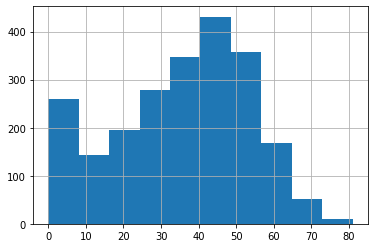

In [13]:
df_right_intersection_00['N_bif_00'].hist()
print(len(df_right_intersection_00))

In [15]:
df_right_intersection_all = df_right_intersection_00.merge(df_right_intersection_01, how='left', on='image_00', suffixes=('', '_y'))
df_right_intersection_all.drop(df_right_intersection_all.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
df_right_intersection_all.head(10)


#dfs = [df_right_intersection_00, df_right_intersection_01, df_right_intersection_10, df_right_intersection_11]
#nan_value = np.nan
#df_right_intersection_all = pd.concat(dfs, join='outer', axis=1).fillna(nan_value)

#df_right_intersection_all['N_green_00'].hist()

,eid,21016-0.0,21016-1.0,21016-0.1,21016-1.1,image_00,image_01,image_10,image_11,image,N_bif_00,N_bif_01
0,1000055,21016_0_0,21016_1_0,0,0,1000055_21016_0_0.png,1000055_21016_0_1.png,1000055_21016_1_0.png,1000055_21016_1_1.png,NaN,NaN,NaN
1,1004088,21016_0_0,21016_1_0,0,0,1004088_21016_0_0.png,1004088_21016_0_1.png,1004088_21016_1_0.png,1004088_21016_1_1.png,NaN,NaN,NaN
2,1004621,21016_0_0,21016_1_0,0,0,1004621_21016_0_0.png,1004621_21016_0_1.png,1004621_21016_1_0.png,1004621_21016_1_1.png,NaN,NaN,NaN
3,1006144,21016_0_0,21016_1_0,0,0,1006144_21016_0_0.png,1006144_21016_0_1.png,1006144_21016_1_0.png,1006144_21016_1_1.png,NaN,NaN,NaN
4,1008018,21016_0_0,21016_1_0,0,0,1008018_21016_0_0.png,1008018_21016_0_1.png,1008018_21016_1_0.png,1008018_21016_1_1.png,NaN,NaN,NaN
5,1012002,21016_0_0,21016_1_0,0,0,1012002_21016_0_0.png,1012002_21016_0_1.png,1012002_21016_1_0.png,1012002_21016_1_1.png,NaN,NaN,NaN
6,1012383,21016_0_0,21016_1_0,0,0,1012383_21016_0_0.png,1012383_21016_0_1.png,1012383_21016_1_0.png,1012383_21016_1_1.png,NaN,NaN,NaN
7,1012688,21016_0_0,21016_1_0,0,0,1012688_21016_0_0.png,1012688_21016_0_1.png,1012688_21016_1_0.png,1012688_21016_1_1.png,NaN,NaN,NaN
8,1015262,21016_0_0,21016_1_0,0,0,1015262_21016_0_0.png,1015262_21016_0_1.png,1015262_21016_1_0.png,1015262_21016_1_1.png,NaN,NaN,NaN
9,1015525,21016_0_0,21016_1_0,0,0,1015525_21016_0_0.png,1015525_21016_0_1.png,1015525_21016_1_0.png,1015525_21016_1_1.png,NaN,NaN,NaN


In [16]:
df_right_intersection_all = df_right_intersection_all.merge(df_right_intersection_10, how='left', on='image_00', suffixes=('', '_y'))
df_right_intersection_all.drop(df_right_intersection_all.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
df_right_intersection_all.head(10)

,eid,21016-0.0,21016-1.0,21016-0.1,21016-1.1,image_00,image_01,image_10,image_11,image,N_bif_00,N_bif_01,N_bif_10
0,1000055,21016_0_0,21016_1_0,0,0,1000055_21016_0_0.png,1000055_21016_0_1.png,1000055_21016_1_0.png,1000055_21016_1_1.png,NaN,NaN,NaN,NaN
1,1004088,21016_0_0,21016_1_0,0,0,1004088_21016_0_0.png,1004088_21016_0_1.png,1004088_21016_1_0.png,1004088_21016_1_1.png,NaN,NaN,NaN,NaN
2,1004621,21016_0_0,21016_1_0,0,0,1004621_21016_0_0.png,1004621_21016_0_1.png,1004621_21016_1_0.png,1004621_21016_1_1.png,NaN,NaN,NaN,NaN
3,1006144,21016_0_0,21016_1_0,0,0,1006144_21016_0_0.png,1006144_21016_0_1.png,1006144_21016_1_0.png,1006144_21016_1_1.png,NaN,NaN,NaN,NaN
4,1008018,21016_0_0,21016_1_0,0,0,1008018_21016_0_0.png,1008018_21016_0_1.png,1008018_21016_1_0.png,1008018_21016_1_1.png,NaN,NaN,NaN,NaN
5,1012002,21016_0_0,21016_1_0,0,0,1012002_21016_0_0.png,1012002_21016_0_1.png,1012002_21016_1_0.png,1012002_21016_1_1.png,NaN,NaN,NaN,NaN
6,1012383,21016_0_0,21016_1_0,0,0,1012383_21016_0_0.png,1012383_21016_0_1.png,1012383_21016_1_0.png,1012383_21016_1_1.png,NaN,NaN,NaN,NaN
7,1012688,21016_0_0,21016_1_0,0,0,1012688_21016_0_0.png,1012688_21016_0_1.png,1012688_21016_1_0.png,1012688_21016_1_1.png,NaN,NaN,NaN,NaN
8,1015262,21016_0_0,21016_1_0,0,0,1015262_21016_0_0.png,1015262_21016_0_1.png,1015262_21016_1_0.png,1015262_21016_1_1.png,NaN,NaN,NaN,NaN
9,1015525,21016_0_0,21016_1_0,0,0,1015525_21016_0_0.png,1015525_21016_0_1.png,1015525_21016_1_0.png,1015525_21016_1_1.png,NaN,NaN,NaN,NaN


In [19]:
df_right_intersection_all = df_right_intersection_all.merge(df_right_intersection_11, how='left', on='image_00', suffixes=('', '_y'))
df_right_intersection_all.drop(df_right_intersection_all.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
len(df_right_intersection_all)
df_right_intersection_all.head(100)

,eid,21016-0.0,21016-1.0,21016-0.1,21016-1.1,image_00,image_01,image_10,image_11,image,N_bif_00,N_bif_01,N_bif_10,N_bif_11
0,1000055,21016_0_0,21016_1_0,0,0,1000055_21016_0_0.png,1000055_21016_0_1.png,1000055_21016_1_0.png,1000055_21016_1_1.png,NaN,NaN,NaN,NaN,NaN
1,1004088,21016_0_0,21016_1_0,0,0,1004088_21016_0_0.png,1004088_21016_0_1.png,1004088_21016_1_0.png,1004088_21016_1_1.png,NaN,NaN,NaN,NaN,NaN
2,1004621,21016_0_0,21016_1_0,0,0,1004621_21016_0_0.png,1004621_21016_0_1.png,1004621_21016_1_0.png,1004621_21016_1_1.png,NaN,NaN,NaN,NaN,NaN
3,1006144,21016_0_0,21016_1_0,0,0,1006144_21016_0_0.png,1006144_21016_0_1.png,1006144_21016_1_0.png,1006144_21016_1_1.png,NaN,NaN,NaN,NaN,NaN
4,1008018,21016_0_0,21016_1_0,0,0,1008018_21016_0_0.png,1008018_21016_0_1.png,1008018_21016_1_0.png,1008018_21016_1_1.png,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1216797,21016_0_0,21016_1_0,0,0,1216797_21016_0_0.png,1216797_21016_0_1.png,1216797_21016_1_0.png,1216797_21016_1_1.png,1216797_21016_0_0.png,43.0,NaN,42.0,NaN
96,1219319,21016_0_0,21016_1_0,0,0,1219319_21016_0_0.png,1219319_21016_0_1.png,1219319_21016_1_0.png,1219319_21016_1_1.png,1219319_21016_0_0.png,52.0,NaN,56.0,NaN
97,1220527,21016_0_0,21016_1_0,0,0,1220527_21016_0_0.png,1220527_21016_0_1.png,1220527_21016_1_0.png,1220527_21016_1_1.png,1220527_21016_0_0.png,23.0,NaN,36.0,NaN
98,1224649,21016_0_0,21016_1_0,0,0,1224649_21016_0_0.png,1224649_21016_0_1.png,1224649_21016_1_0.png,1224649_21016_1_1.png,1224649_21016_0_0.png,37.0,NaN,35.0,NaN


<AxesSubplot:>

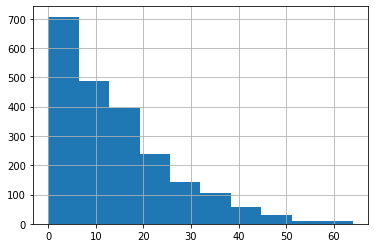

In [20]:
df_right_intersection_all['00_menos_10']=abs(df_right_intersection_all['N_bif_00']-df_right_intersection_all['N_bif_10'])
df_right_intersection_all['00_menos_10'].hist()

In [21]:
print(len(df_right_intersection_all))

2283


<AxesSubplot:>

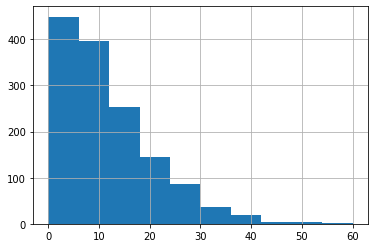

In [24]:
# Filter by QC
df_QC = pd.read_csv("/SSD/home/sofia/Codigos_auxiliares/ageCorrected_ventiles5.txt", sep=',', header=None)
df_QC.columns = ['image_QC']
df_QC.head(10)
df_right_QC = pd.merge(df_QC, df_right_intersection_all, how='inner', left_on=['image_QC'],right_on=['image_00'], suffixes=('', '_y'))
df_right_QC.drop(df_right_QC.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
df_right_QC = pd.merge(df_QC, df_right_intersection_all, how='inner', left_on=['image_QC'],right_on=['image_10'], suffixes=('', '_y'))
df_right_QC.drop(df_right_QC.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

df_right_QC['00_menos_10']=abs(df_right_QC['N_bif_00']-df_right_QC['N_bif_10'])
df_right_QC['00_menos_10'].hist()
#df_right_intersection_all['image_10'])
#df_left_intersection = pd.merge(df_QC, df_left_intersection, how='left', on='image')

In [ ]:
#df_right_intersection = df_right_intersection.merge(pheno_tVA, how='left', left_on=['image_00'], right_on=['image'])
#df_right_intersection = df_right_intersection.merge(pheno_tAA, how='left', left_on=['image_00'], right_on=['image'])
#df_right_intersection = df_right_intersection.merge(pheno_NeoOD, how='left', left_on=['image_00'], right_on=['image'])
#df_right_intersection = df_right_intersection.merge(pheno_greenOD, how='left', left_on=['image_00'], right_on=['image'])
#df_right_intersection = df_right_intersection.merge(pheno_N_green_seg, how='left', left_on=['image_00'], right_on=['image'])
#df_right_intersection = df_right_intersection.merge(pheno_FD, how='left', left_on=['image_00'], right_on=['image'])
#df_right_intersection = df_right_intersection.merge(pheno_VD, how='left', left_on=['image_00'], right_on=['image'])
